# Principal Component Analysis Tutorial
---

In [47]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
digits = load_digits()

In [49]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [50]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


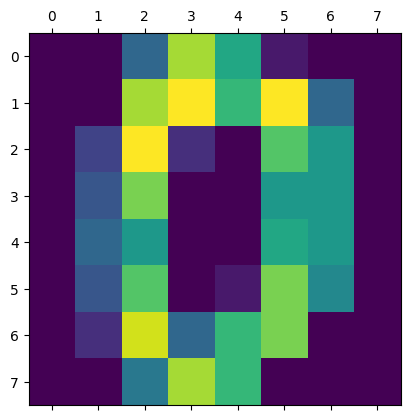

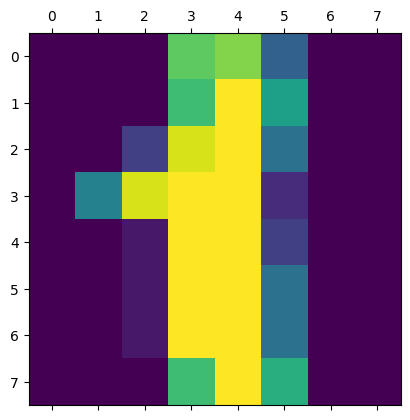

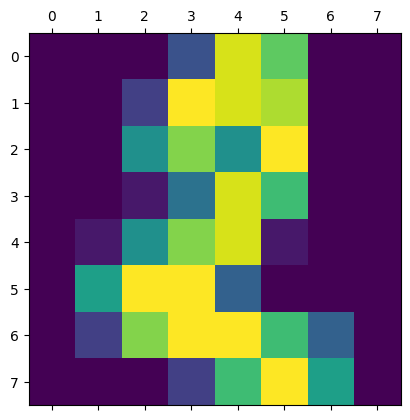

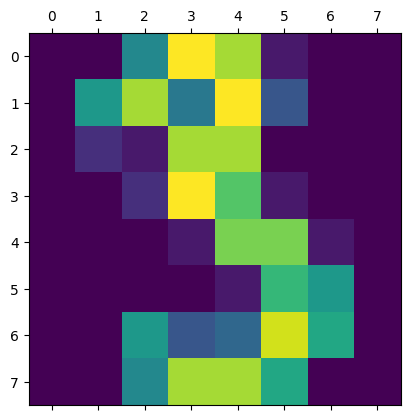

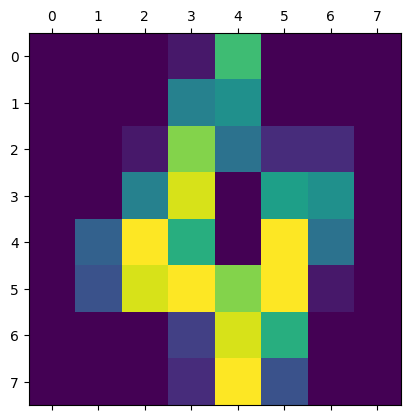

In [51]:
for i in range(5):
    plt.matshow(digits.images[i])

In [52]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [53]:
X = df
y = digits.target

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 124)

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9583333333333334

# Use PCA to reduce dimensions

In [57]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [59]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [60]:
pca.n_components_

29

# PCA created 29 components out of 64 original columns

In [61]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [62]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state= 124)

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9527777777777777

# Let's now select only two components

In [65]:
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [66]:
X_pca

array([[ -1.25946755,  21.27488504],
       [  7.95761139, -20.76870519],
       [  6.99192415,  -9.95598183],
       ...,
       [ 10.80128287,  -6.96025388],
       [ -4.87209809,  12.42396521],
       [ -0.34439031,   6.36555149]])

In [67]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

# You can see that both combined retains 0.14 + 0.13 = 0.27 or 27% of important feature information

In [68]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size= 0.2, random_state= 30)


model = LogisticRegression(max_iter= 1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

We get less accuracy (~60%) as using only components did not retain much of the feature infomation. However in real life you will find many cases where using 2 or few using 2 or few PCA components can still give you a pretty good accuracy

# Exercise

Download heart disease dataset heart.csv (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
2. Remove outlies using Z score. Usual guide line is to remote anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding 
4. Apply scalling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in term of accuracy. Keep in mind that many times doing PCA redices the accuracy but computation is much lighter and that's the trade off you need yo consider while building models in real life


In [69]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [71]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Treat Outliers

In [72]:
df[df.Cholesterol > (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [73]:
df.shape

(918, 12)

In [74]:
df1 = df[df.Cholesterol <= (df.Cholesterol.mean() + 3 * df.Cholesterol.std())]
df1.shape

(915, 12)

In [75]:
df[df.MaxHR > (df.MaxHR.mean() + 3 * df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [76]:
df[df.FastingBS > (df.FastingBS.mean() + 3 * df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [79]:
df[df.Oldpeak > (df.Oldpeak.mean() + 3 * df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [80]:
df2 = df1[df1.Oldpeak <= (df1.Oldpeak.mean() + 3 * df1.Oldpeak.std())]
df2.shape

(909, 12)

In [81]:
df[df.RestingBP > (df.RestingBP.mean() + 3 * df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [82]:
df3 = df2[df2.RestingBP <= (df2.RestingBP.mean() + 3 * df2.RestingBP.std())]
df3.shape

(902, 12)

In [85]:
def print_unique_col_values(df3):
    for columns in df3:
        if df[columns].dtypes == 'object':
            print(f'{columns}: {df[columns].unique()}')
        

print_unique_col_values(df3)

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [86]:
df4 = df3.copy()

df4['Sex'].replace({'M': 0, 'F': 1},inplace= True)
df4['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace= True)
df4['ST_Slope'].replace({'Up': 2,'Flat': 1, 'Down': 0}, inplace= True)
df4['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace= True)

/tmp/ipykernel_33/750080870.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['Sex'].replace({'M': 0, 'F': 1},inplace= True)
/tmp/ipykernel_33/750080870.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['Sex'].replace({'M': 0, 'F': 1},inplace= True)
/tmp/ipykernel_33/750080870.py:4: Futu

In [87]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,0,172,0,0.0,2,0
1,49,1,NAP,160,180,0,0,156,0,1.0,1,1
2,37,0,ATA,130,283,0,1,98,0,0.0,2,0
3,48,1,ASY,138,214,0,0,108,1,1.5,1,1
4,54,0,NAP,150,195,0,0,122,0,0.0,2,0


In [88]:
df5 = pd.get_dummies(df4, drop_first= True)
df5.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,2,0,True,False,False
1,49,1,160,180,0,0,156,0,1.0,1,1,False,True,False
2,37,0,130,283,0,1,98,0,0.0,2,0,True,False,False
3,48,1,138,214,0,0,108,1,1.5,1,1,False,False,False
4,54,0,150,195,0,0,122,0,0.0,2,0,False,True,False


In [89]:
df5.replace({True: 1, False: 0}, inplace= True)

/tmp/ipykernel_33/2190236502.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5.replace({True: 1, False: 0}, inplace= True)


In [90]:
df5.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,2,0,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,1,0,1,0
2,37,0,130,283,0,1,98,0,0.0,2,0,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,2,0,0,1,0


In [91]:
X = df5.drop('HeartDisease', axis = 'columns')
y = df5['HeartDisease']

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269, -0.51485643,  0.46089071, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.94228905,  1.5925728 , ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.51485643, -0.10495034, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.51485643, -0.10495034, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878,  1.94228905, -0.10495034, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227, -0.51485643,  0.3477225 , ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y ,test_size = 0.2, random_state = 124) 

In [96]:
X_train.shape

(721, 13)

In [97]:
X_test.shape

(181, 13)

In [98]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 40)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.850828729281768

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [108]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'DecisionTree':{
        'model': DecisionTreeClassifier(),
        'params': {
            'random_state': [10]
        }
    },
    'KNeighbors':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors': [10, 20, 30]
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [40, 50, 60]
        }
    },
    'RidgeClassifier':{
        'model': RidgeClassifier(),
        'params': {
            'alpha': [2, 3],
            'max_iter': [10, 20],
            'tol': [0.00001]
        }
    }
}

In [111]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv= 5, return_train_score= False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores, columns= ['model', 'best_score', 'bets_params'])
df

,model,best_score,bets_params
0,DecisionTree,0.780881,NaN
1,KNeighbors,0.861312,NaN
2,Random Forest,0.872452,NaN
3,RidgeClassifier,0.853036,NaN


# Use PCA to reduce dimensions

In [99]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0,172,0,0.0,2,1,0,0
1,49,1,160,180,0,0,156,0,1.0,1,0,1,0
2,37,0,130,283,0,1,98,0,0.0,2,1,0,0
3,48,1,138,214,0,0,108,1,1.5,1,0,0,0
4,54,0,150,195,0,0,122,0,0.0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,0,132,0,1.2,1,0,0,1
914,68,0,144,193,1,0,141,0,3.4,1,0,0,0
915,57,0,130,131,0,0,115,1,1.2,1,0,0,0
916,57,1,130,236,0,2,174,0,0.0,1,1,0,0


In [100]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

In [112]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y ,test_size = 0.2, random_state = 124) 

In [113]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 10)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6629834254143646

In [114]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv= 5, return_train_score= False)
    clf.fit(X_train_pca, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores, columns= ['model', 'best_score', 'bets_params'])
df

,model,best_score,bets_params
0,DecisionTree,0.599138,NaN
1,KNeighbors,0.718410,NaN
2,Random Forest,0.692079,NaN
3,RidgeClassifier,0.687912,NaN
